## Suicide rates in areas in the North East

In [1]:
# Dependencies and Setup
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
during_covid_path = "../../CSVs/DuringCovid_a.csv"
pre_covid_path = "../../CSVs/PreCovid_a.csv"

# Read the covid data and the study results
during_covid = pd.read_csv(during_covid_path)
pre_covid = pd.read_csv(pre_covid_path)

In [2]:
# Display the data table for preview
during_covid

,Parent Name,Area Name,Time period,Value,Count,Compared to England value or percentiles,Compared to Region value or percentiles
0,North East region,Hartlepool,2019 - 21,14.667019,36.0,Similar,Similar
1,North East region,Middlesbrough,2019 - 21,14.879852,54.0,Worse,Similar
2,North East region,Redcar and Cleveland,2019 - 21,19.750601,69.0,Worse,Worse
3,North East region,Stockton-on-Tees,2019 - 21,10.206445,52.0,Similar,Similar
4,North East region,Darlington,2019 - 21,16.598023,47.0,Worse,Similar
...,...,...,...,...,...,...,...
144,East of England region,Suffolk,2019 - 21,10.387505,208.0,Similar,Similar
145,South East region,Surrey,2019 - 21,10.096817,316.0,Similar,Similar
146,West Midlands region,Warwickshire,2019 - 21,11.215052,172.0,Similar,Similar
147,South East region,West Sussex,2019 - 21,11.533312,265.0,Similar,Similar


In [3]:
pre_covid

,Parent Name,Area Name,Time period,Value,Count,Compared to England value or percentiles,Compared to Region value or percentiles
0,North East region,Hartlepool,2017 - 19,10.361530,26.0,Similar,Similar
1,North East region,Middlesbrough,2017 - 19,14.464680,49.0,Worse,Similar
2,North East region,Redcar and Cleveland,2017 - 19,13.538658,47.0,Similar,Similar
3,North East region,Stockton-on-Tees,2017 - 19,8.673680,45.0,Similar,Better
4,North East region,Darlington,2017 - 19,13.646433,38.0,Similar,Similar
...,...,...,...,...,...,...,...
142,East of England region,Suffolk,2017 - 19,9.531723,188.0,Similar,Similar
143,South East region,Surrey,2017 - 19,8.180909,255.0,Better,Better
144,West Midlands region,Warwickshire,2017 - 19,9.382023,143.0,Similar,Similar
145,South East region,West Sussex,2017 - 19,9.678995,216.0,Similar,Similar


In [4]:
#Dataframe for areas in the North East pre-covid
not_ne = []
for x in range(len(pre_covid)):
    if pre_covid["Parent Name"][x] != "North East region":
        not_ne.append(x)
pre_covid.drop(not_ne, inplace=True)
pre_covid.reset_index(drop=True, inplace=True)
pre_covid

,Parent Name,Area Name,Time period,Value,Count,Compared to England value or percentiles,Compared to Region value or percentiles
0,North East region,Hartlepool,2017 - 19,10.361530,26.0,Similar,Similar
1,North East region,Middlesbrough,2017 - 19,14.464680,49.0,Worse,Similar
2,North East region,Redcar and Cleveland,2017 - 19,13.538658,47.0,Similar,Similar
3,North East region,Stockton-on-Tees,2017 - 19,8.673680,45.0,Similar,Better
4,North East region,Darlington,2017 - 19,13.646433,38.0,Similar,Similar
5,North East region,County Durham,2017 - 19,13.442550,185.0,Worse,Similar
6,North East region,Northumberland,2017 - 19,12.783826,101.0,Worse,Similar
7,North East region,Newcastle upon Tyne,2017 - 19,10.533960,79.0,Similar,Similar
8,North East region,North Tyneside,2017 - 19,12.625809,70.0,Similar,Similar
9,North East region,South Tyneside,2017 - 19,8.427162,33.0,Similar,Similar


In [5]:
#Dataframe for areas in West Midlands during covid
not_ne_c = []
for x in range(len(during_covid)):
    if during_covid["Parent Name"][x] != "North East region":
        not_ne_c.append(x)
during_covid.drop(not_ne_c, inplace=True)
during_covid.reset_index(drop=True, inplace=True)
during_covid

,Parent Name,Area Name,Time period,Value,Count,Compared to England value or percentiles,Compared to Region value or percentiles
0,North East region,Hartlepool,2019 - 21,14.667019,36.0,Similar,Similar
1,North East region,Middlesbrough,2019 - 21,14.879852,54.0,Worse,Similar
2,North East region,Redcar and Cleveland,2019 - 21,19.750601,69.0,Worse,Worse
3,North East region,Stockton-on-Tees,2019 - 21,10.206445,52.0,Similar,Similar
4,North East region,Darlington,2019 - 21,16.598023,47.0,Worse,Similar
5,North East region,County Durham,2019 - 21,15.787744,217.0,Worse,Worse
6,North East region,Northumberland,2019 - 21,11.453206,95.0,Similar,Similar
7,North East region,Newcastle upon Tyne,2019 - 21,11.554812,85.0,Similar,Similar
8,North East region,North Tyneside,2019 - 21,10.964527,59.0,Similar,Similar
9,North East region,South Tyneside,2019 - 21,7.718725,32.0,Similar,Better


In [6]:
labels=['Hartlepool', 'Middlesbrough', 'Redcar and Cleveland', 'Stockton-on-Tees', 'Darlington', 'County Durham', 'Northumberland', 'Newcastle upon Tyne', 'North Tyneside', 'South Tyneside', 'Sunderland', 'Gateshead']


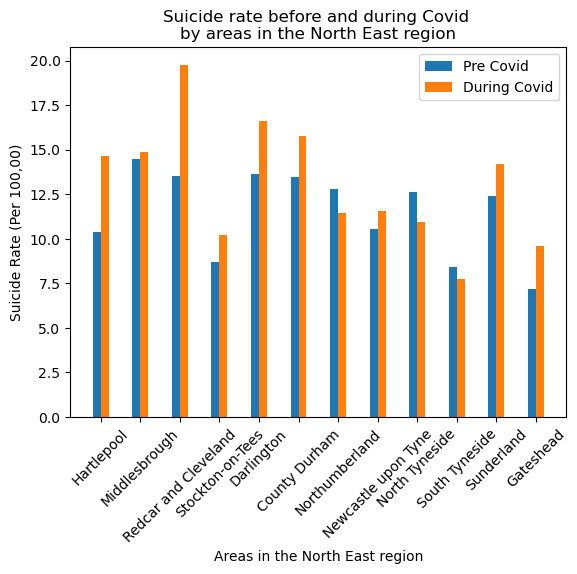

In [7]:
w=0.2
x = ['Hartlepool', 'Middlesbrough', 'Redcar and Cleveland', 'Stockton-on-Tees', 'Darlington', 'County Durham', 'Northumberland', 'Newcastle upon Tyne', 'North Tyneside', 'South Tyneside', 'Sunderland', 'Gateshead']

pre_covid = [10.361530, 14.464680, 13.538658, 8.673680, 13.646433, 13.442550, 12.783826, 10.533960, 12.625809, 8.427162, 12.411931, 7.184391]
during_covid = [14.667019, 14.879852, 19.750601, 10.206445, 16.598023, 15.787744, 11.453206, 11.554812, 10.964527, 7.718725, 14.200588, 9.586024]

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plt.bar(bar1, pre_covid,w,label="Pre Covid")
plt.bar(bar2, during_covid,w,label="During Covid")

plt.xlabel('Areas in the North East region')
plt.ylabel('Suicide Rate (Per 100,00)')
plt.title('Suicide rate before and during Covid \nby areas in the North East region')
plt.legend()
plt.xticks(bar1+w/2, x, rotation=45)
plt.rcParams["figure.figsize"] = (18,10)
#plt.savefig('Images/suicide_by_area_North_East_region.png')
